# Introduction



**In this notebook, I tried to analyze what cause profit and loss in Sales Data.**

# Importing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install plotly_express

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

import warnings
warnings.filterwarnings('ignore')

import datetime

In [3]:
df=pd.read_csv('SalesForCourse.csv')

# Data Outline

In [4]:
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

# Data Preprocessing

In [6]:
df[df['Date'].isnull()]

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
34866,34866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095,NaN


* There is a line which has no values except 'Revenue'. So I dropprd it. And 'Column1 seems to be unnecessary. So I also dropped it.

In [7]:
df=df.dropna(subset=['Date'])

In [8]:
df=df.drop('Column1', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34866 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34866 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 4.3+ MB


* Convert 'Date' to datetime

In [10]:
df["Date"] = pd.to_datetime(df["Date"])

* Create Year & Month column

In [11]:
df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')

# Exploratory Data Analysis

**1) What countries does data have as market?**

In [12]:
print(df['Country'].unique())

['United States' 'France' 'United Kingdom' 'Germany']


**2) What states does data have as market?**

In [13]:
print(df['State'].unique())

['Washington' 'California' 'Oregon' 'Essonne' 'Yveline' 'England' 'Hessen'
 'Hamburg' 'Seine Saint Denis' 'Saarland' 'Nordrhein-Westfalen' 'Bayern'
 'Seine (Paris)' 'Pas de Calais' 'Moselle' 'Hauts de Seine' 'Nord'
 'Seine et Marne' 'Loiret' 'Charente-Maritime' 'Loir et Cher'
 'Brandenburg' 'Alabama' "Val d'Oise" 'Val de Marne' 'Minnesota' 'Wyoming'
 'Ohio' 'Garonne (Haute)' 'Kentucky' 'Texas' 'Missouri' 'Somme' 'New York'
 'Florida' 'Illinois' 'South Carolina' 'North Carolina' 'Georgia'
 'Virginia' 'Mississippi' 'Montana' 'Arizona' 'Massachusetts' 'Utah']


**3) What Product categories does data have ?**

In [14]:
print(df['Product Category'].unique())

['Accessories' 'Clothing' 'Bikes']


**4) What Product sub categories does data have ?**

In [15]:
print(df['Sub Category'].unique())

['Tires and Tubes' 'Gloves' 'Helmets' 'Bike Stands' 'Mountain Bikes'
 'Hydration Packs' 'Jerseys' 'Fenders' 'Cleaners' 'Socks' 'Caps'
 'Touring Bikes' 'Bottles and Cages' 'Vests' 'Road Bikes' 'Bike Racks'
 'Shorts']


**5) Create new column which shows 'Margin' ( 'Revenue' - 'Cost')**

In [16]:
df['Margin']=df['Revenue']-df['Cost']

**6) Create new column which shows 'Unit Margin' ( 'Unit Price' - 'Unit Cost')**

In [17]:
df['Unit_Margin']=df['Unit Price']-df['Unit Cost']

# Data Visualization and Analysis

**1) Revenue by year and month**

In [18]:
df.groupby('Year')['Revenue'].sum()

Year
2015.0     9947771.0
2016.0    12396805.0
Name: Revenue, dtype: float64

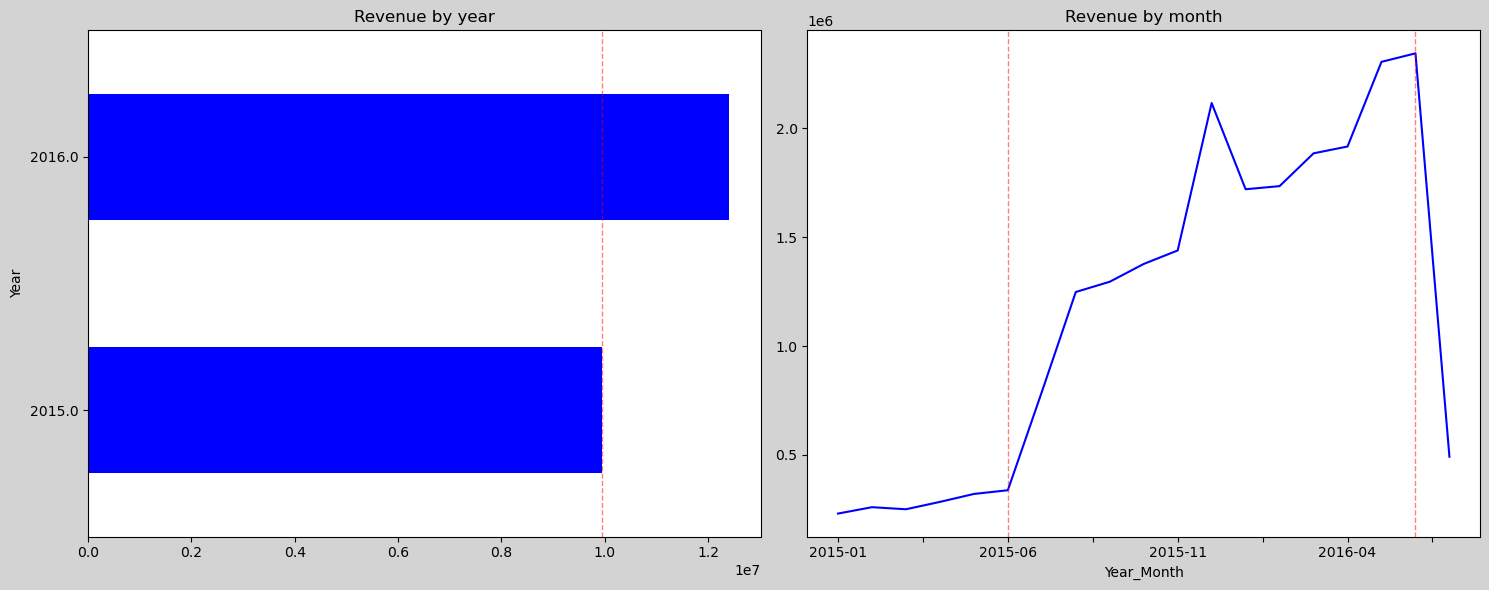

In [19]:
plt.figure(figsize = (15,6), facecolor='lightgrey')
plt.subplot(1, 2, 1, title="Revenue by year")
df.groupby('Year')['Revenue'].sum().plot.barh(color='blue',title='Revenue by year')
plt.axvline(x=9947771,color='red',lw=1,ls='--',alpha=0.5)
plt.subplot(1, 2, 2, title="Revenue by month")
df.groupby('Year_Month')['Revenue'].sum().plot(color='blue')
plt.axvline(x=5,color='red',lw=1,ls='--',alpha=0.5)
plt.axvline(x=17,color='red',lw=1,ls='--',alpha=0.5)            
plt.tight_layout()
plt.show()

In [20]:
print(df['Year_Month'].unique())

['2016-02' '2016-03' '2016-04' '2016-06' '2016-07' '2015-08' '2015-09'
 '2015-10' '2015-11' '2015-12' '2015-07' '2016-05' '2016-01' '2015-04'
 '2015-01' '2015-03' '2015-06' '2015-02' '2015-05']


* Data has 12 months in 2015 and 7 months. But total revenue in 2016 is larger than that of 2015.
* Revenue increased rapidly after June 2015.
* Revenue decreaced rapidly in July 2016.

**2) Margin by Year and Month**

In [21]:
df.groupby('Year')['Margin'].sum()

Year
2015.0     288620.0
2016.0    1972982.0
Name: Margin, dtype: float64

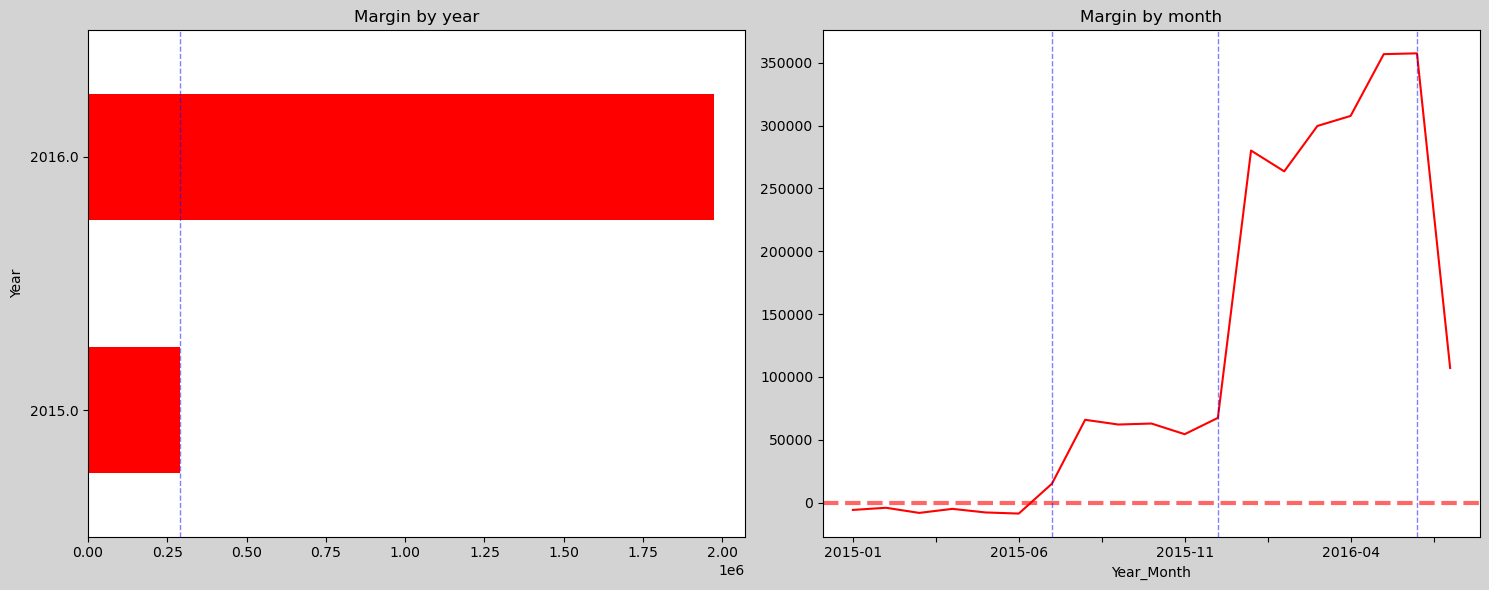

In [22]:
plt.figure(figsize = (15,6), facecolor='lightgrey')
plt.subplot(1, 2, 1, title="Margin by year")
df.groupby('Year')['Margin'].sum().plot.barh(color='red',title='Margin by year')
plt.axvline(x=288620,color='blue',lw=1,ls='--',alpha=0.5)
plt.subplot(1, 2, 2, title="Margin by month")
df.groupby('Year_Month')['Margin'].sum().plot(color='red')
plt.axhline(y=0,color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x=6,color='blue',lw=1,ls='--',alpha=0.5)
plt.axvline(x=11,color='blue',lw=1,ls='--',alpha=0.5)
plt.axvline(x=17,color='blue',lw=1,ls='--',alpha=0.5) 
plt.tight_layout()
plt.show()

* Data has 12 months in 2015 and 7 months. But total margin in 2016 is larger than that of 2015.
* Margin had been negative until June 2015 and turned to positive in July 2015.
* Margin increased rapidly in December in 2015 and decreaced rapidly in July 2016.

**3) Profitability by Year and Month**

In [23]:
df.groupby('Year')['Margin'].sum()/df.groupby('Year')['Revenue'].sum()*100

Year
2015.0     2.901353
2016.0    15.915246
dtype: float64

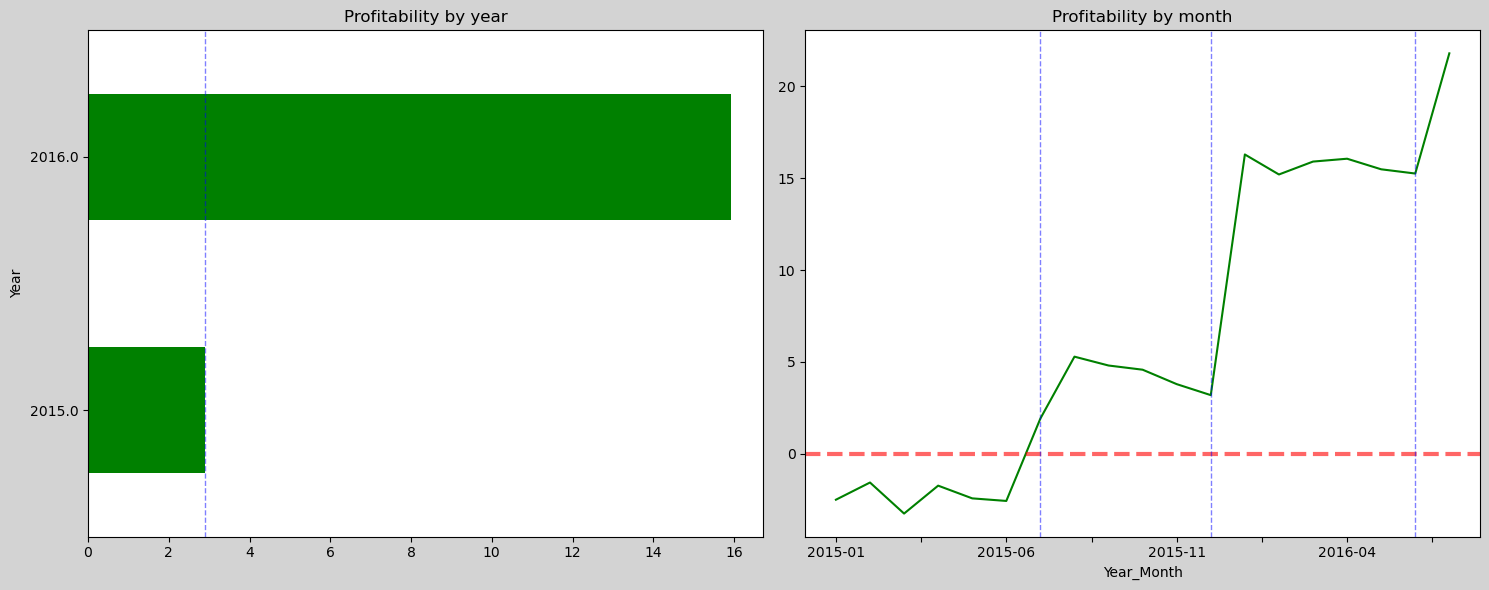

In [24]:
plt.figure(figsize = (15,6), facecolor='lightgrey')
plt.subplot(1, 2, 1, title="Profitability by year")
(df.groupby('Year')['Margin'].sum()/df.groupby('Year')['Revenue'].sum()*100).plot.barh(color='green',title='Profitability by year')
plt.axvline(x=2.901353,color='blue',lw=1,ls='--',alpha=0.5)
plt.subplot(1, 2, 2, title="Profitability by month")
(df.groupby('Year_Month')['Margin'].sum()/df.groupby('Year_Month')['Revenue'].sum()*100).plot(color='green')
plt.axhline(y=0,color='red',lw=3,ls='--',alpha=0.6)
plt.axvline(x=6,color='blue',lw=1,ls='--',alpha=0.5)
plt.axvline(x=11,color='blue',lw=1,ls='--',alpha=0.5)
plt.axvline(x=17,color='blue',lw=1,ls='--',alpha=0.5) 
plt.tight_layout()
plt.show()

* Data has 12 months in 2015 and 7 months. But profitability in 2016 is larger than that of 2015.
* Profitability had been negative until June 2015 and turned to positive in July 2015.
* Profitability increased rapidly in December in 2015 and decreaced rapidly in July 2016.

**4) Revenue, Margin and Profitability by Product Category**

In [25]:
df.groupby('Product Category')['Margin'].sum()/df.groupby('Product Category')['Revenue'].sum()*100

Product Category
Accessories    18.580130
Bikes           2.939148
Clothing       15.861032
dtype: float64

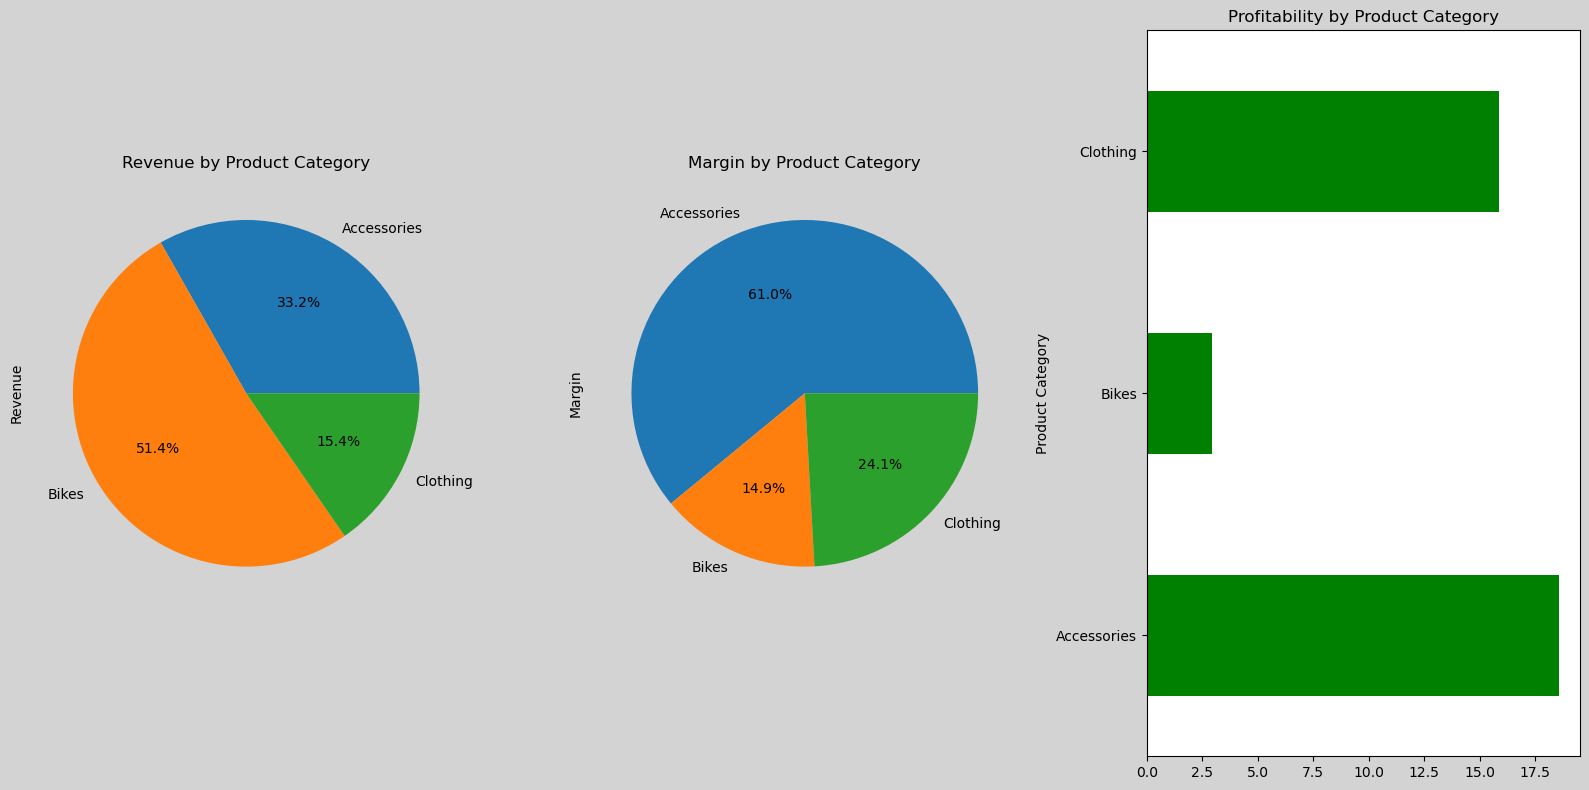

In [26]:
plt.figure(figsize = (16,8), facecolor='lightgrey')
plt.subplot(1, 3, 1, title="Revenue by Product Category")
df.groupby('Product Category')['Revenue'].sum().plot.pie(autopct="%1.1f%%")
plt.subplot(1, 3, 2, title="Margin by Product Category")
df.groupby('Product Category')['Margin'].sum().plot.pie(autopct="%1.1f%%")
plt.subplot(1, 3, 3, title="Profitability by Product Category")
(df.groupby('Product Category')['Margin'].sum()/df.groupby('Product Category')['Revenue'].sum()*100).plot.barh(color='green',title='Profitability by Product Category')
plt.tight_layout()
plt.show()

* Bikes occupies 51.4%, Accessories occupies 33.2% and Clothing occupies 15.4% in Revenue.
* Bikes occupies 14.9%, Accessories occupies 61.0% and Clothing occupies 24.1% in Margin.
* Profitability of Bikes is 2.9%, Profitability of Accessories is 18.6% and Profitability of Clotjing is 15.9%
* Bikes is highest in sales volume, but Accessories is most profitable.

**5) Revenue and Margin by Customer Age**

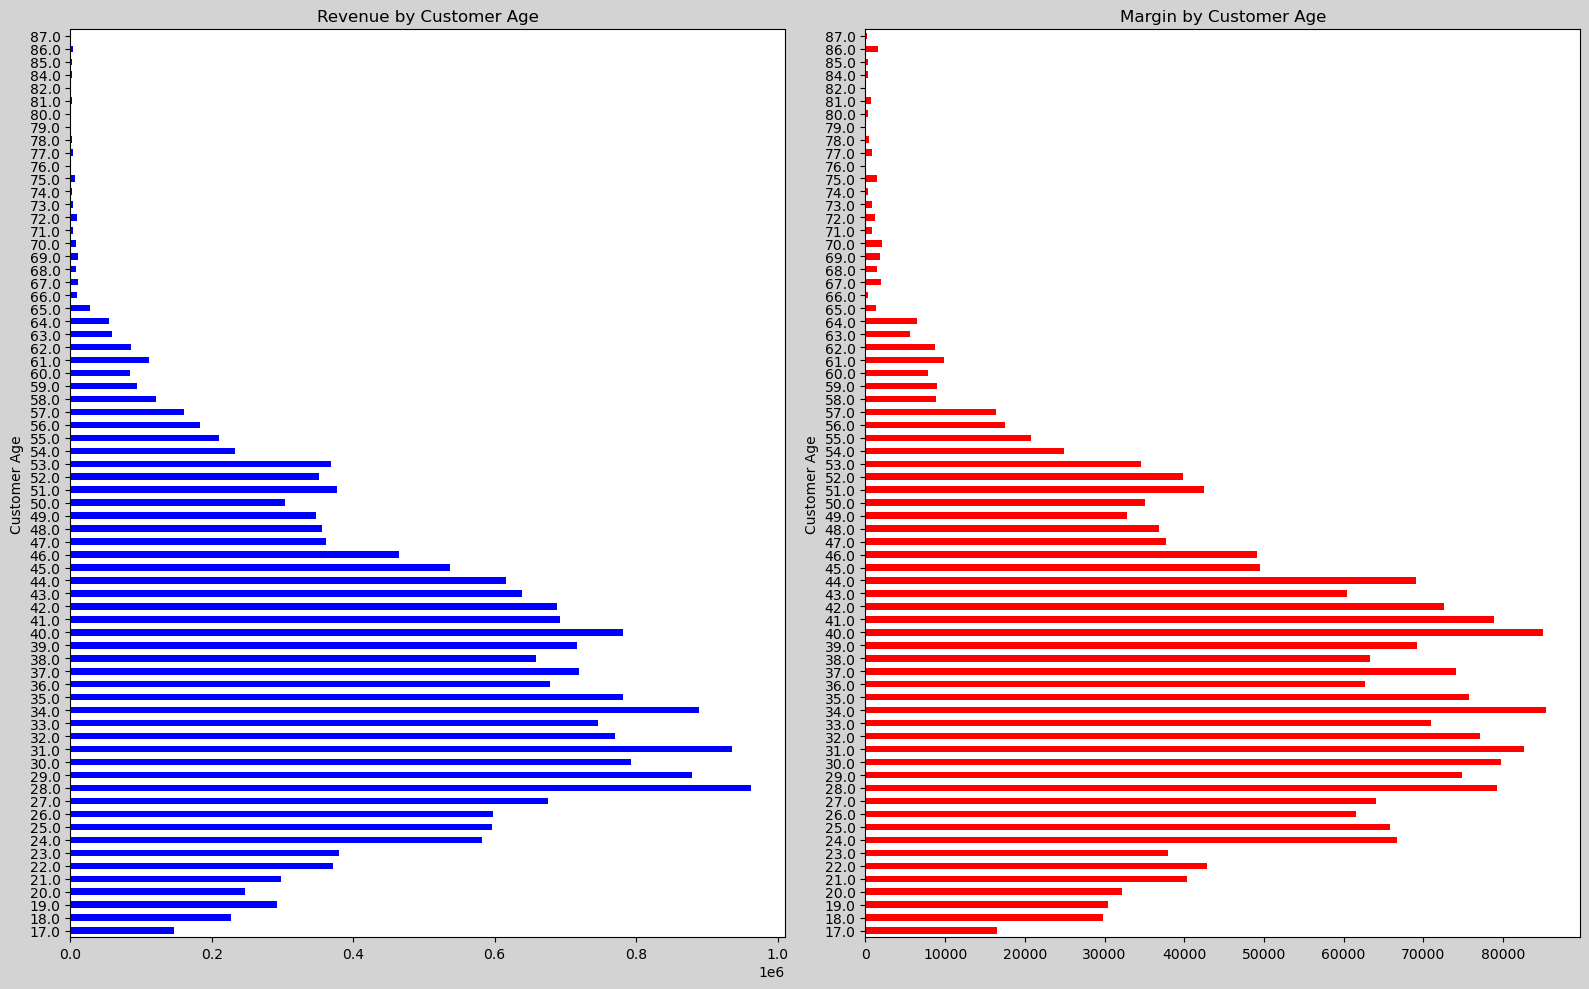

In [27]:
plt.figure(figsize = (16,10), facecolor='lightgrey')
plt.subplot(1, 2, 1, title="Revenue by Customer Age")
df.groupby('Customer Age')['Revenue'].sum().plot.barh(color='blue')
plt.subplot(1, 2, 2, title="Margin by Customer Age")
df.groupby('Customer Age')['Margin'].sum().plot.barh(color='red')
plt.tight_layout()
plt.show()

**It is too much age...So I summarized them to generation, 10s, 20s....**

In [28]:
import math
df['generation']=df['Customer Age'].apply(lambda x:math.floor(x/10)*10)
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Year_Month,Margin,Unit_Margin,generation
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,2016-02,29.0,29.000000,20
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,2016-02,8.0,4.000000,20
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,2016-02,4.0,1.330000,20
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,2016-03,58.0,29.000000,20
4,4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,2016-03,20.0,6.666667,20


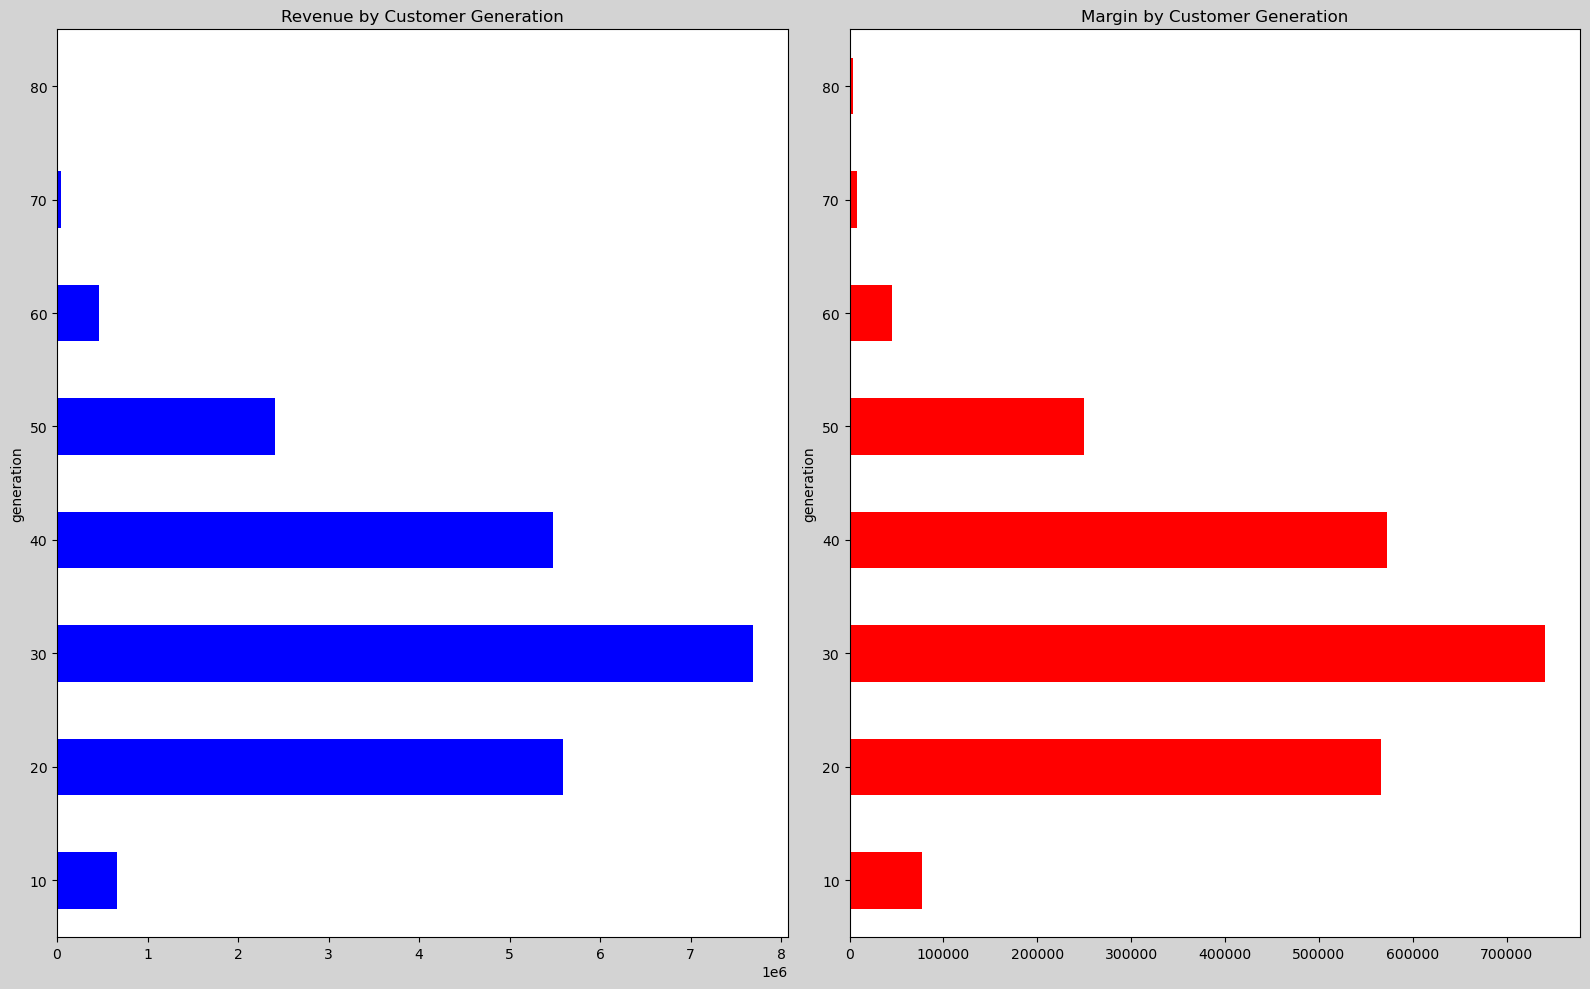

In [29]:
plt.figure(figsize = (16,10), facecolor='lightgrey')
plt.subplot(1, 2, 1, title="Revenue by Customer Generation")
df.groupby('generation')['Revenue'].sum().plot.barh(color='blue')
plt.subplot(1, 2, 2, title="Margin by Customer Generation")
df.groupby('generation')['Margin'].sum().plot.barh(color='red')
plt.tight_layout()
plt.show()

* 30s generation is highet sales and margin. Next one is 20s and 40s.

**6) Revenue, Margin and Profitability by Customer Gender**

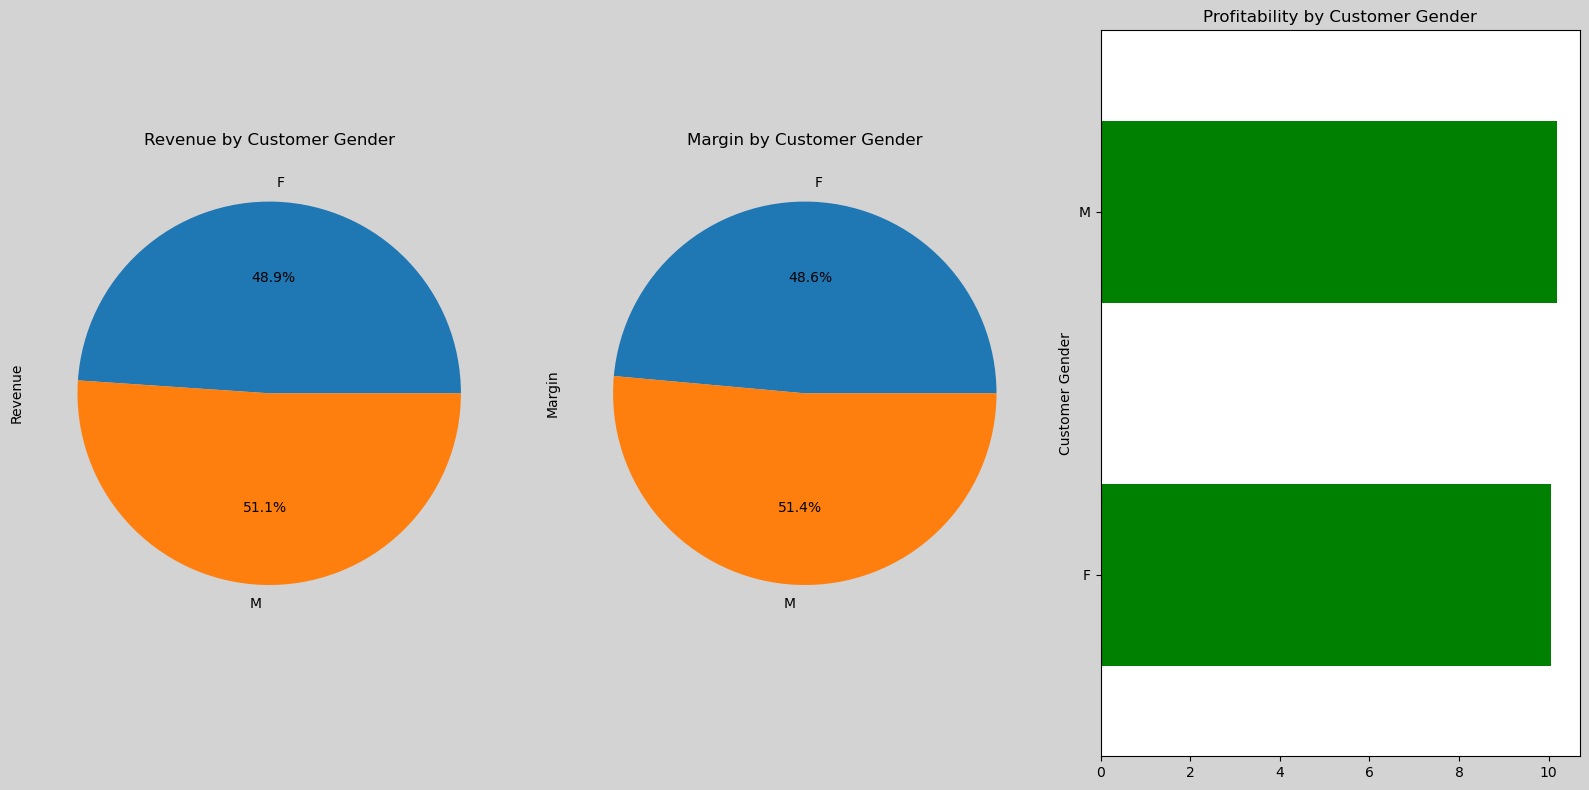

In [30]:
plt.figure(figsize = (16,8), facecolor='lightgrey')
plt.subplot(1, 3, 1, title="Revenue by Customer Gender")
df.groupby('Customer Gender')['Revenue'].sum().plot.pie(autopct="%1.1f%%")
plt.subplot(1, 3, 2, title="Margin by Customer Gender")
df.groupby('Customer Gender')['Margin'].sum().plot.pie(autopct="%1.1f%%")
plt.subplot(1, 3, 3, title="Profitability by Customer Gender")
(df.groupby('Customer Gender')['Margin'].sum()/df.groupby('Customer Gender')['Revenue'].sum()*100).plot.barh(color='green',title='Profitability by Customer Gender')
plt.tight_layout()
plt.show()

* We can not find any specific gap in Revenue, Margin and Profitability between male and female.

**7) Revenue, Margin and Profitability by Country**

In [31]:
df.groupby('Country')['Margin'].sum()/df.groupby('Country')['Revenue'].sum()*100

Country
France             7.912036
Germany           22.589769
United Kingdom     7.692658
United States      6.756431
dtype: float64

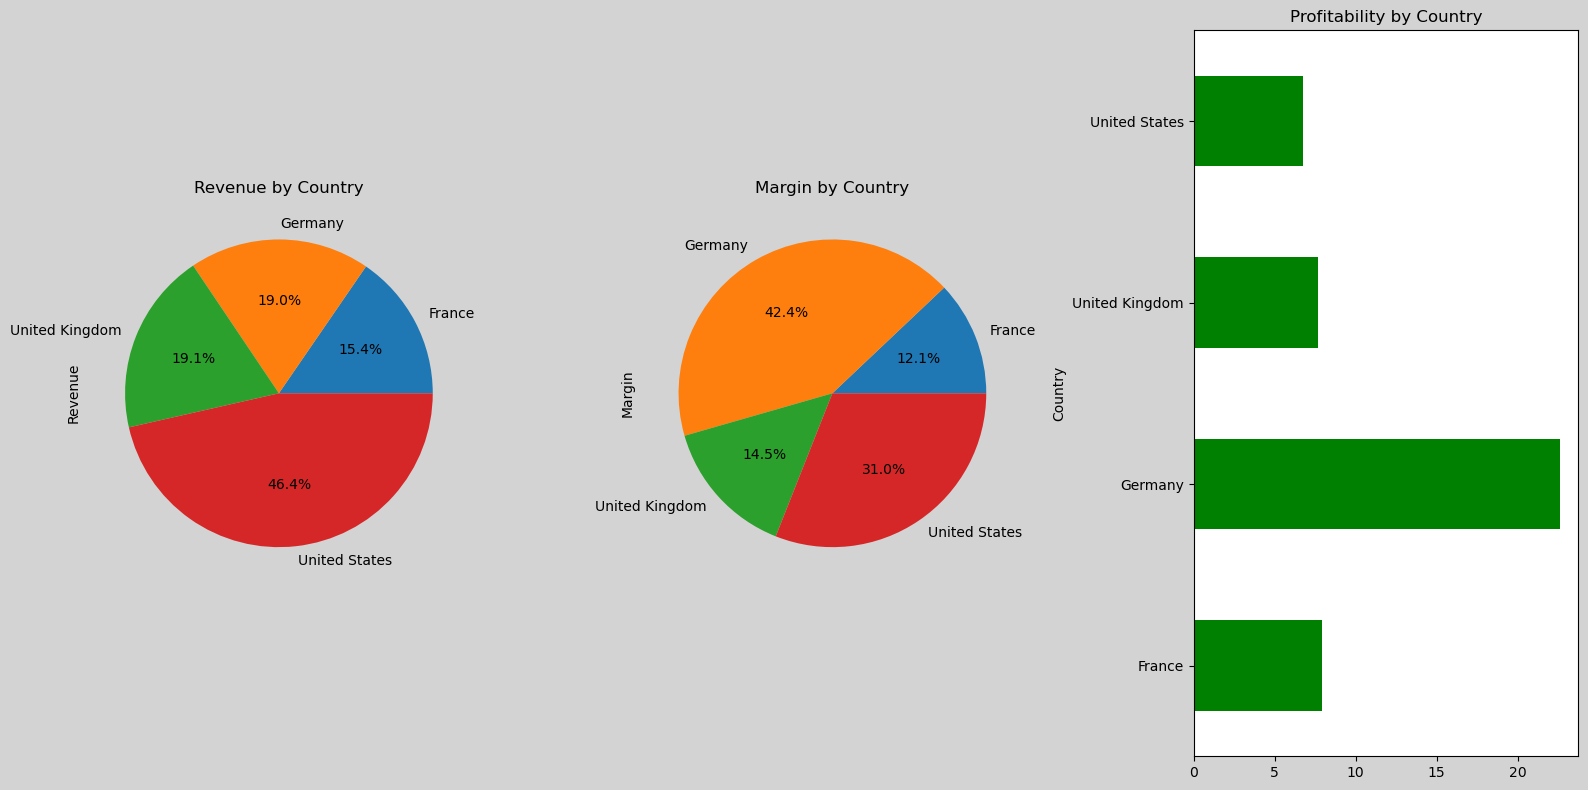

In [32]:
plt.figure(figsize = (16,8), facecolor='lightgrey')
plt.subplot(1, 3, 1, title="Revenue by Country")
df.groupby('Country')['Revenue'].sum().plot.pie(autopct="%1.1f%%")
plt.subplot(1, 3, 2, title="Margin by Country")
df.groupby('Country')['Margin'].sum().plot.pie(autopct="%1.1f%%")
plt.subplot(1, 3, 3, title="Profitability by Country")
(df.groupby('Country')['Margin'].sum()/df.groupby('Country')['Revenue'].sum()*100).plot.barh(color='green',title='Profitability by Country')
plt.tight_layout()
plt.show()

* United States occupies 46.4%, United Kingdom occupies 19.1%, Germany occupies 19.0% and France occupies 15.4% in Revenue.
* United States occupies 31.0%, United Kingdom occupies 14.5%, Germany occupies 42.4% and France occupies 12.1% in Margin.
* Profitability of United States is 6.8%, Profitability of United Kingdom is 7.7%, Profitability of Germany is 22.6% and Profitability of France is 7.9%
* United States is highest in sales volume, but Profitability is worst. Germany is highest in Profitability.

**What causes those gap?**

# Drill Down to "Product Category" and "Product Sub Category"

**1) Time Series Analysis by Product Category**

In [33]:
Total=df.groupby('Year_Month')['Revenue'].sum()
Bikes=df[df['Product Category']=='Bikes'].groupby('Year_Month')['Revenue'].sum()
Accessories=df[df['Product Category']=='Accessories'].groupby('Year_Month')['Revenue'].sum()
Clothing=df[df['Product Category']=='Clothing'].groupby('Year_Month')['Revenue'].sum()

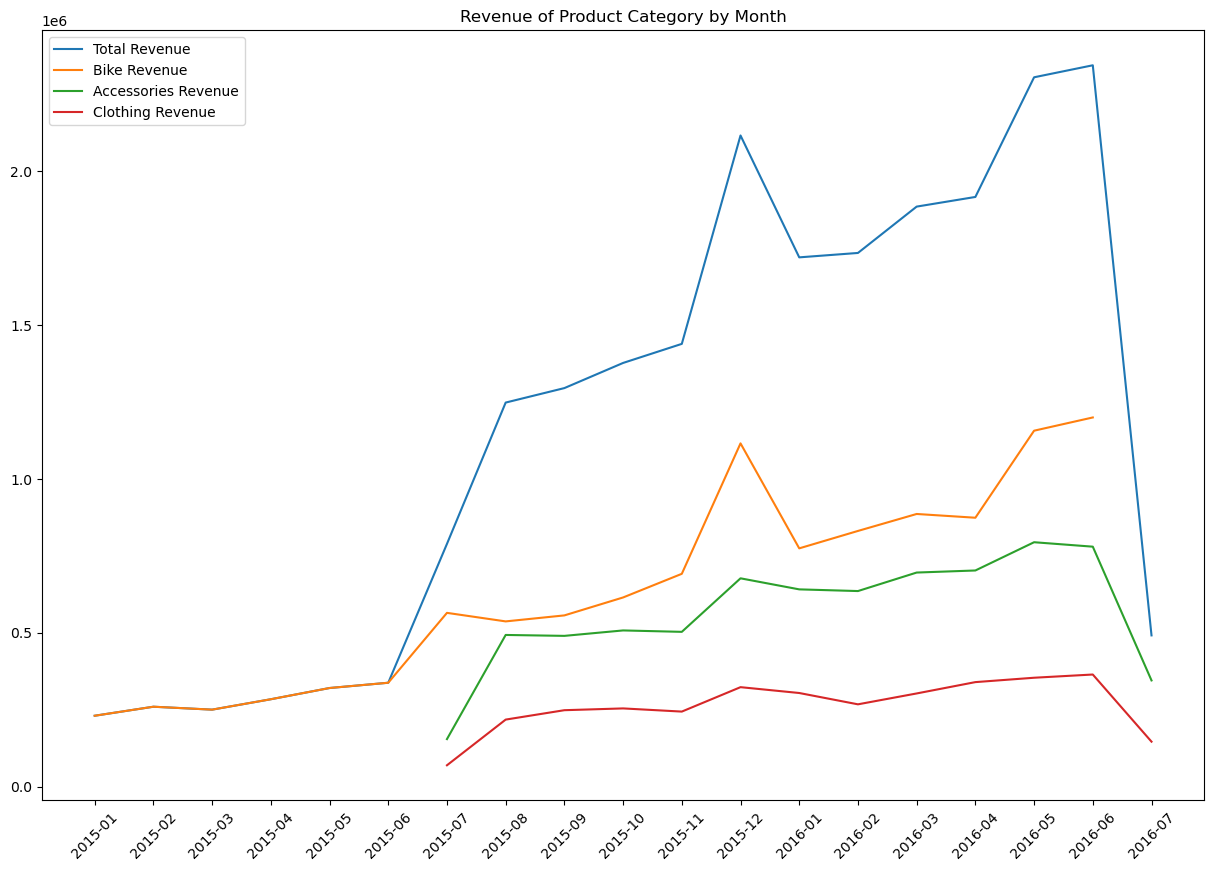

In [34]:
plt.figure(figsize=[15,10])
plt.plot(Total,label='Total Revenue')
plt.plot(Bikes,label='Bike Revenue')
plt.plot(Accessories,label='Accessories Revenue')
plt.plot(Clothing,label='Clothing Revenue')
plt.legend(loc=2)
plt.title('Revenue of Product Category by Month')
plt.xticks(rotation=45)
plt.show();

In [35]:
Total_Margin=df.groupby('Year_Month')['Margin'].sum()
Bikes_Margin=df[df['Product Category']=='Bikes'].groupby('Year_Month')['Margin'].sum()
Accessories_Margin=df[df['Product Category']=='Accessories'].groupby('Year_Month')['Margin'].sum()
Clothing_Margin=df[df['Product Category']=='Clothing'].groupby('Year_Month')['Margin'].sum()

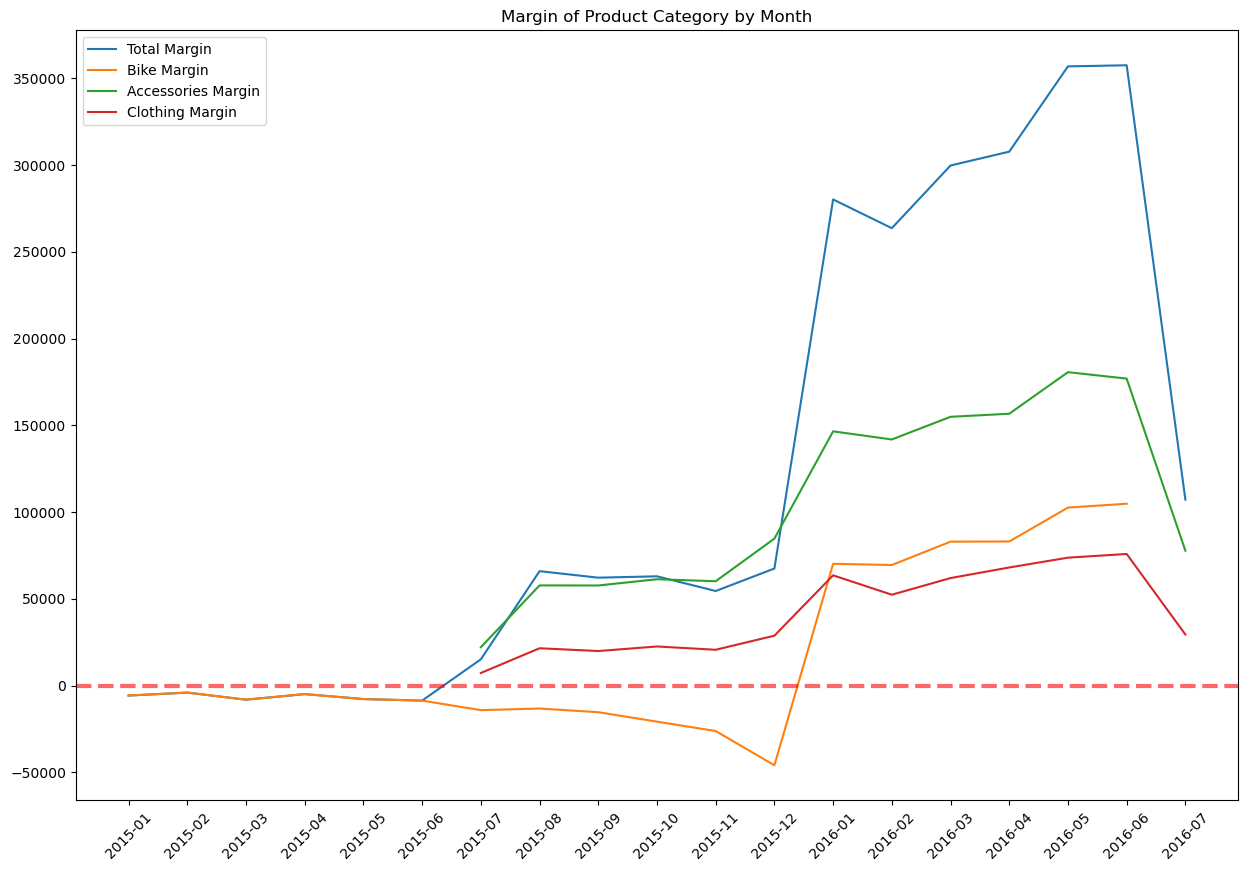

In [36]:
plt.figure(figsize=[15,10])
plt.plot(Total_Margin,label='Total Margin')
plt.plot(Bikes_Margin,label='Bike Margin')
plt.plot(Accessories_Margin,label='Accessories Margin')
plt.plot(Clothing_Margin,label='Clothing Margin')
plt.legend(loc=2)
plt.title('Margin of Product Category by Month')
plt.xticks(rotation=45)
plt.axhline(y=0,color='red',lw=3,ls='--',alpha=0.6)
plt.show();

**Until June 2015, they sold only Bikes, and they started to sell Accessories and Clothing in July 2015. At the same time, negative margin turned to positive in July 2015.**

**So one of the issues is that how we can improve  the profitability of Bikes. As next step, I looked into Bikes Sub Categories.**

In [37]:
#I tried to find Revenue and Margin by Sub Category
#plt.figure(figsize = (16,10), facecolor='lightgrey')
#plt.subplot(1, 2, 1, title="Revenue by Sub Category")
#df.groupby('Sub Category')['Revenue'].sum().plot.barh(color='blue')
#plt.subplot(1, 2, 2, title="Margin by Sub Category")
#df.groupby('Sub Category')['Margin'].sum().plot.barh(color='red')
#plt.tight_layout()
#plt.show()

**2) Time Series Analysis of Revenue and Margin by Bikes Sub Category - Touring Bikes, Road Bikes and Mountaion Bikes**

In [38]:
Touring_Bikes=df[df['Sub Category']=='Touring Bikes'].groupby('Year_Month')['Revenue'].sum()
Road_Bikes=df[df['Sub Category']=='Road Bikes'].groupby('Year_Month')['Revenue'].sum()
Mountain_Bikes=df[df['Sub Category']=='Mountain Bikes'].groupby('Year_Month')['Revenue'].sum()

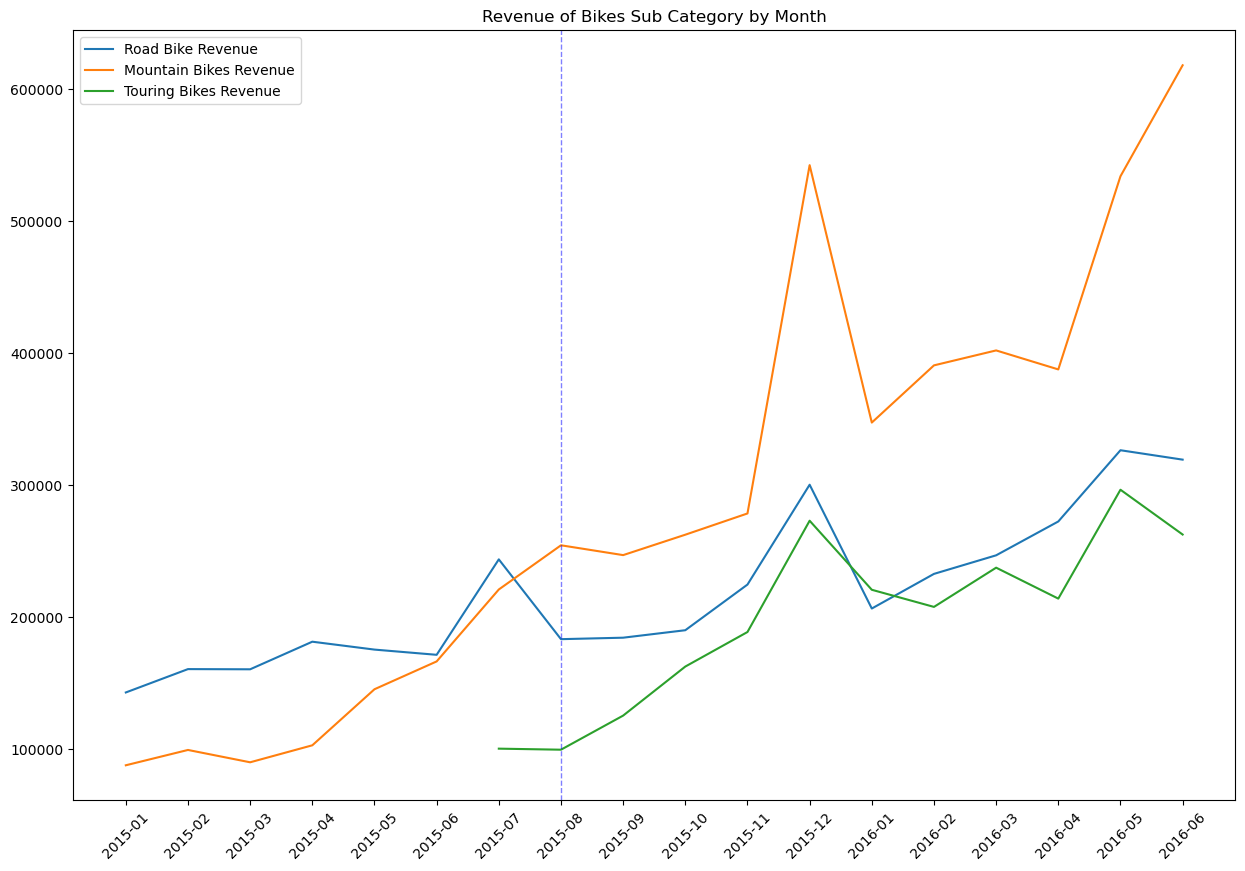

In [39]:
plt.figure(figsize=[15,10])
plt.plot(Road_Bikes,label='Road Bike Revenue')
plt.plot(Mountain_Bikes,label='Mountain Bikes Revenue')
plt.plot(Touring_Bikes,label='Touring Bikes Revenue')
plt.axvline(x=7,color='blue',lw=1,ls='--',alpha=0.5)
plt.legend(loc=2)
plt.title('Revenue of Bikes Sub Category by Month')
plt.xticks(rotation=45)
plt.show();

* In August 2015, Mountain Bikes became highest in Revenue and since then, it has been highest.

In [40]:
Touring_Bikes_m=df[df['Sub Category']=='Touring Bikes'].groupby('Year_Month')['Margin'].sum()
Road_Bikes_m=df[df['Sub Category']=='Road Bikes'].groupby('Year_Month')['Margin'].sum()
Mountain_Bikes_m=df[df['Sub Category']=='Mountain Bikes'].groupby('Year_Month')['Margin'].sum()

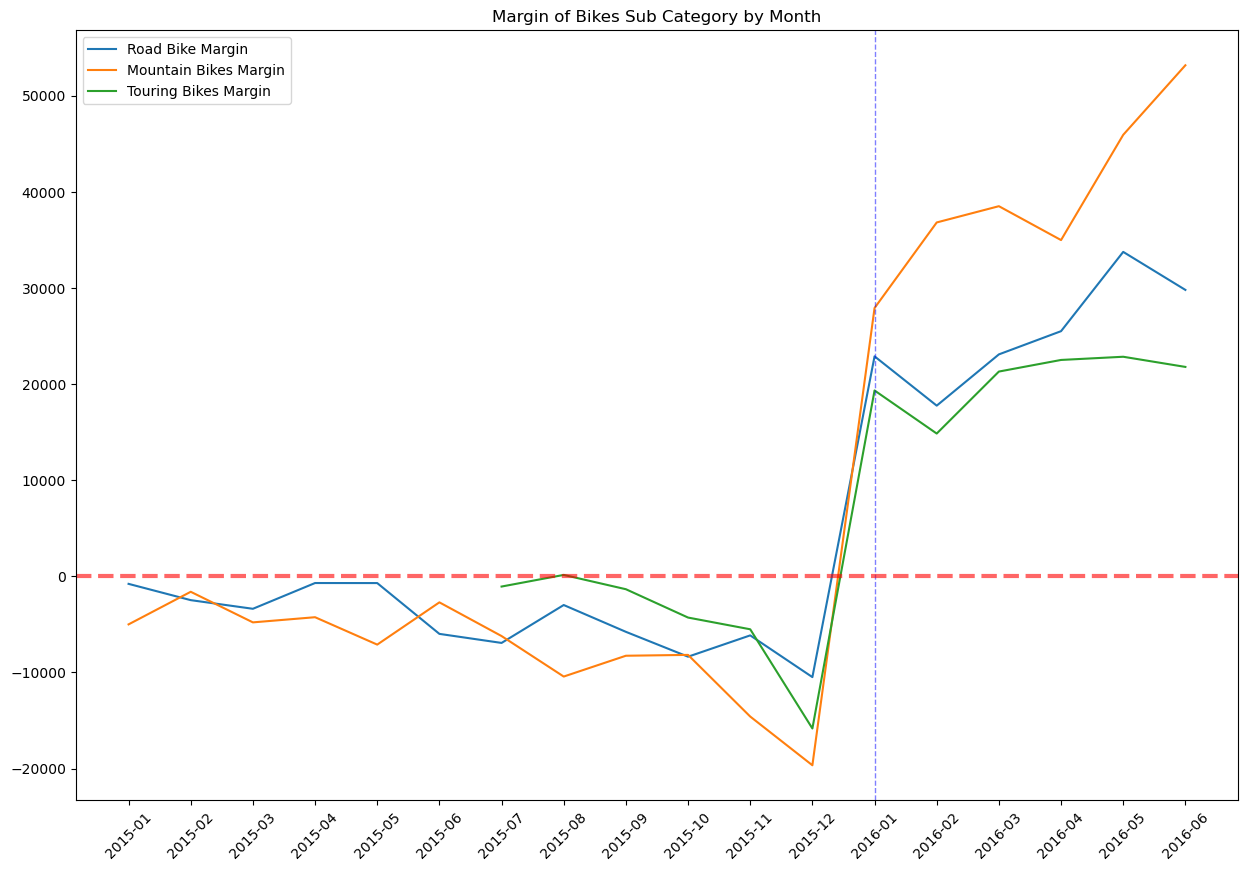

In [41]:
plt.figure(figsize=[15,10])
plt.plot(Road_Bikes_m,label='Road Bike Margin')
plt.plot(Mountain_Bikes_m,label='Mountain Bikes Margin')
plt.plot(Touring_Bikes_m,label='Touring Bikes Margin')
plt.axvline(x=12,color='blue',lw=1,ls='--',alpha=0.5)
plt.legend(loc=2)
plt.title('Margin of Bikes Sub Category by Month')
plt.xticks(rotation=45)
plt.axhline(y=0,color='red',lw=3,ls='--',alpha=0.6);
plt.show();

* Until December 2015, three Bikes Categories had been negative in Margin in almost every months. But they turned to positive in January 2016.

**How about Unit Price, Unit Cost and Unit Margin of Bikes ?**

**3) Time Series Analysis of Unit Price, Unit Cost and Unit Margin by Bikes Sub Category - Touring Bikes, Road Bikes and Mountaion Bikes**

In [42]:
Touring_Bikes_Price=df[df['Sub Category']=='Touring Bikes'].groupby('Year_Month')['Unit Price'].mean()
Road_Bikes_Price=df[df['Sub Category']=='Road Bikes'].groupby('Year_Month')['Unit Price'].mean()
Mountain_Bikes_Price=df[df['Sub Category']=='Mountain Bikes'].groupby('Year_Month')['Unit Price'].mean()

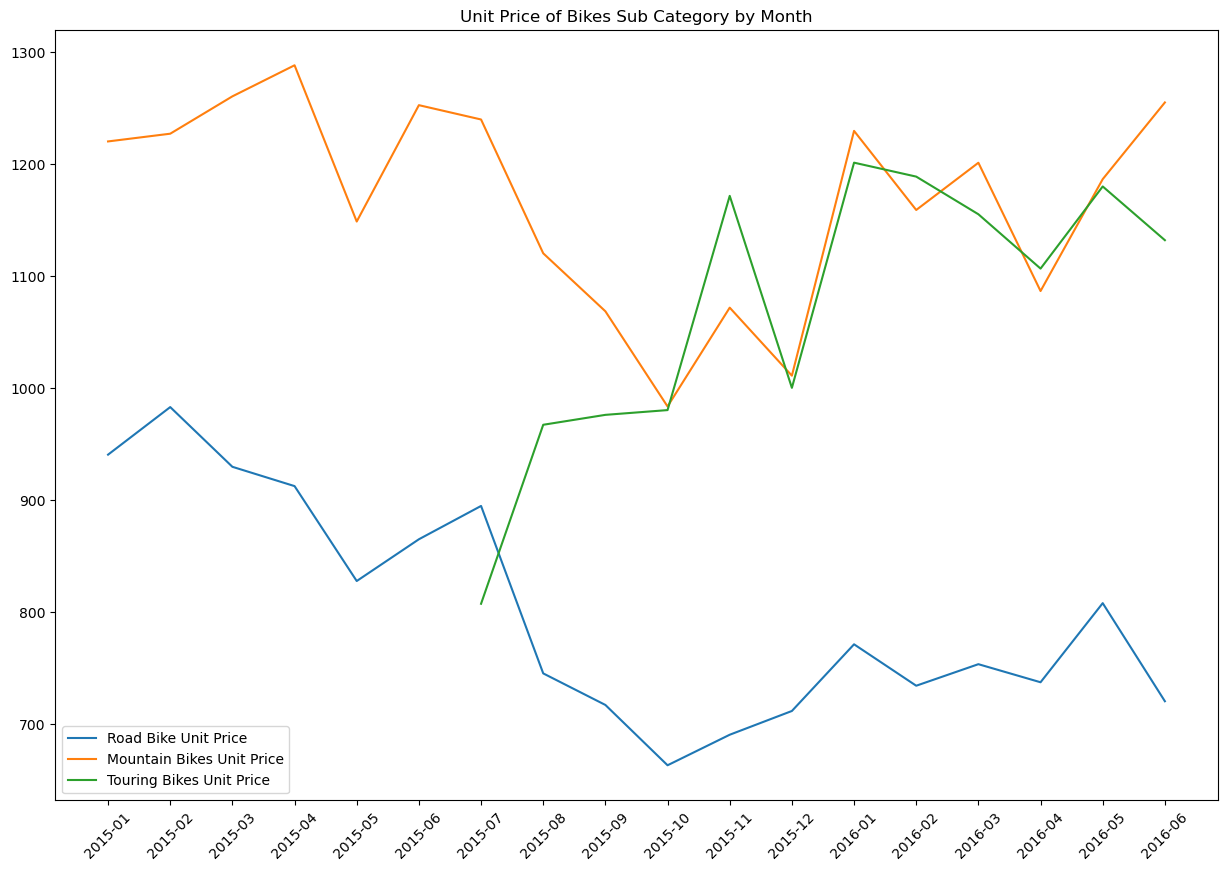

In [43]:
plt.figure(figsize=[15,10])
plt.plot(Road_Bikes_Price,label='Road Bike Unit Price')
plt.plot(Mountain_Bikes_Price,label='Mountain Bikes Unit Price')
plt.plot(Touring_Bikes_Price,label='Touring Bikes Unit Price')
plt.legend(loc=3)
plt.title('Unit Price of Bikes Sub Category by Month')
plt.xticks(rotation=45)
plt.show();

In [44]:
Touring_Bikes_Cost2=df[df['Sub Category']=='Touring Bikes'].groupby('Year_Month')['Unit Cost'].mean()
Road_Bikes_Cost2=df[df['Sub Category']=='Road Bikes'].groupby('Year_Month')['Unit Cost'].mean()
Mountain_Bikes_Cost2=df[df['Sub Category']=='Mountain Bikes'].groupby('Year_Month')['Unit Cost'].mean()

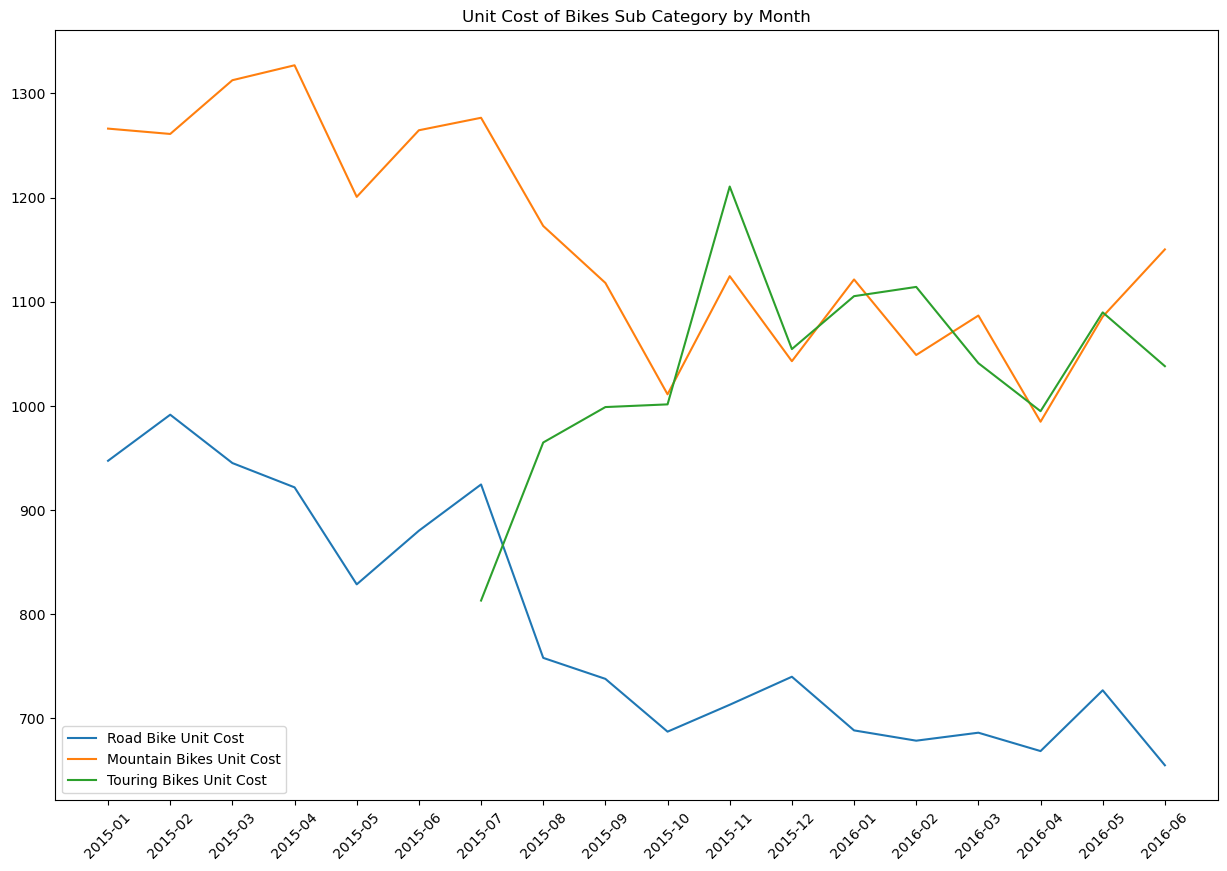

In [45]:
plt.figure(figsize=[15,10])
plt.plot(Road_Bikes_Cost2,label='Road Bike Unit Cost')
plt.plot(Mountain_Bikes_Cost2,label='Mountain Bikes Unit Cost')
plt.plot(Touring_Bikes_Cost2,label='Touring Bikes Unit Cost')
plt.legend(loc=3)
plt.title('Unit Cost of Bikes Sub Category by Month')
plt.xticks(rotation=45)
plt.show();

In [46]:
Touring_Bikes_Margin2=df[df['Sub Category']=='Touring Bikes'].groupby('Year_Month')['Unit_Margin'].mean()
Road_Bikes_Margin2=df[df['Sub Category']=='Road Bikes'].groupby('Year_Month')['Unit_Margin'].mean()
Mountain_Bikes_Margin2=df[df['Sub Category']=='Mountain Bikes'].groupby('Year_Month')['Unit_Margin'].mean()

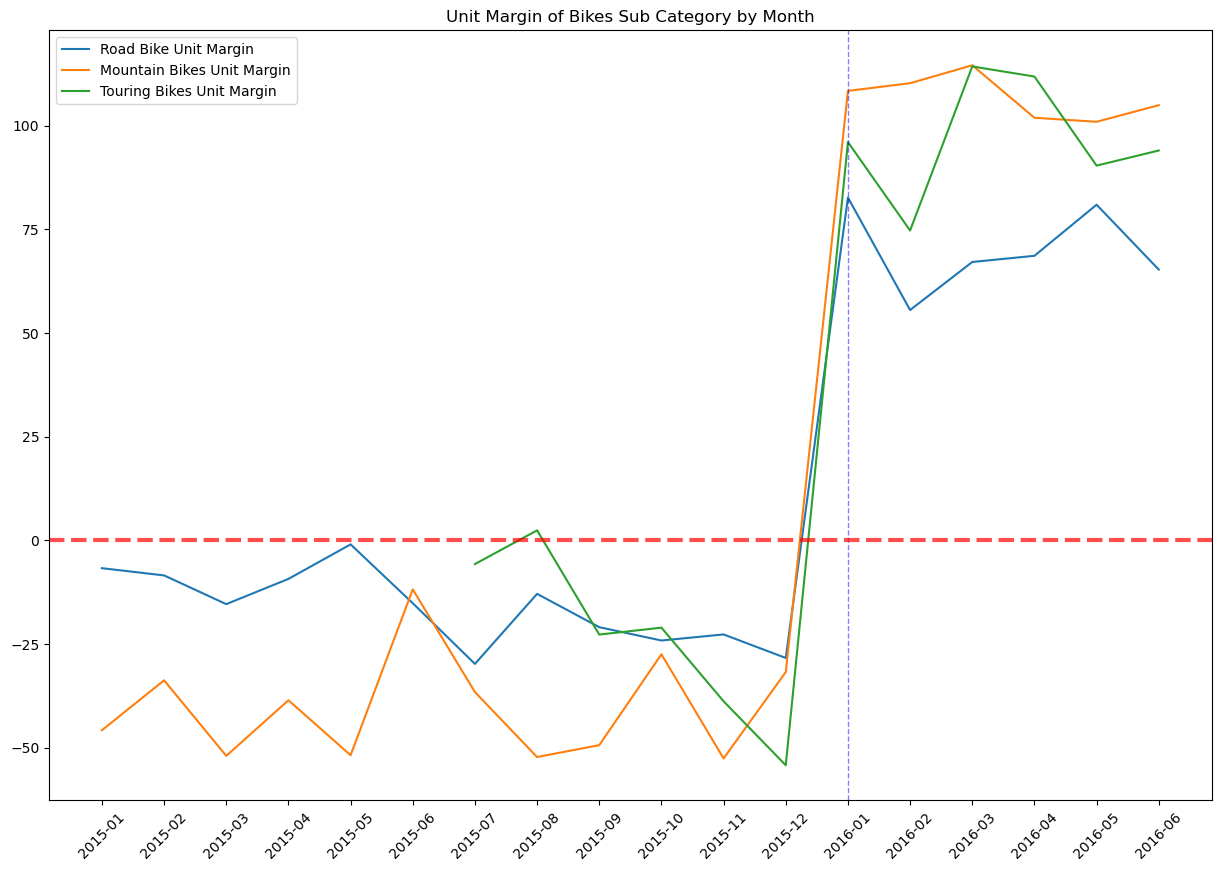

In [47]:
plt.figure(figsize=[15,10])
plt.plot(Road_Bikes_Margin2,label='Road Bike Unit Margin')
plt.plot(Mountain_Bikes_Margin2,label='Mountain Bikes Unit Margin')
plt.plot(Touring_Bikes_Margin2,label='Touring Bikes Unit Margin')
plt.axvline(x=12,color='blue',lw=1,ls='--',alpha=0.5)
plt.axhline(y=0,color='red',lw=3,ls='--',alpha=0.7)
plt.legend(loc=2)
plt.title('Unit Margin of Bikes Sub Category by Month')
plt.xticks(rotation=45)
plt.show();

* Average Unit Price and Average Unit Cost have been changing month by month. The trend seems to be improved.
* Average Unit Margin of three Categories was improved dramaticaly in January 2016.

**How about Unit Price, Unit Cost and Unit Margin of Bikes by "Country" ?**

**4) Time Series Analysis of Unit Price, Unit Cost and Unit Margin of Mountain Bikes by Countries**

In [48]:
df_Mountain=df[df['Sub Category']=='Mountain Bikes']
df_Mountain.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Year_Month,Margin,Unit_Margin,generation
49,49,2016-06-11,2016.0,June,18.0,M,United States,California,Bikes,Mountain Bikes,1.0,769.0,875.0,769.0,875.0,2016-06,106.0,106.0,10
50,50,2015-08-13,2015.0,August,18.0,M,United States,California,Bikes,Mountain Bikes,1.0,2295.0,2242.0,2295.0,2242.0,2015-08,-53.0,-53.0,10
51,51,2015-09-10,2015.0,September,18.0,M,United States,California,Bikes,Mountain Bikes,1.0,769.0,776.0,769.0,776.0,2015-09,7.0,7.0,10
52,52,2015-10-20,2015.0,October,18.0,M,United States,California,Bikes,Mountain Bikes,2.0,1160.0,1005.0,2320.0,2010.0,2015-10,-310.0,-155.0,10
53,53,2015-12-21,2015.0,December,18.0,M,United States,California,Bikes,Mountain Bikes,1.0,2295.0,2303.0,2295.0,2303.0,2015-12,8.0,8.0,10


In [49]:
df_Mountain.groupby('Country').mean()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Margin,Unit_Margin,generation
Country,,,,,,,,,,,
France,11896.393204,2015.512136,35.699029,2.004854,1116.404709,1122.533172,1843.558252,1859.276699,15.718447,6.128463,31.310680
Germany,11100.328228,2015.588621,35.122538,1.984683,1153.042319,1406.481036,1852.231947,2256.687090,404.455142,253.438716,30.962801
United Kingdom,10682.446768,2015.524715,35.602662,1.982890,1101.513365,1110.533587,1805.233840,1821.403042,16.169202,9.020222,30.665399
United States,13639.835320,2015.453800,37.903130,2.029061,1109.210939,1085.452931,1845.201192,1804.076006,-41.125186,-23.758008,33.546945


* We can find the gap of Average Unit Price of Mountain Bikes among coutries. The  Average Unit Price of M/B of Germany is highest, 1,406. And that of United States is lowest, 1,085. The variance of both countries is 321.
* On the other hand, the gap of Average Unit Cost of Mountain Bikes among coutries is not so large. The vaiance between Germany and United Kingdom is 52.

**The hypothesis which we may have is that the gap between profit and loss comes from 'Pricing' by coutries.**

**So I look into Time Series Analysis of Unit Price, Unit Cost and Unit Margin of "Mountain Bikes" by Countries as case study.**

# Case Study of  Mountain Bikes by Countries

**1) Time Series Analysis of Unit Price, Unit Cost and Unit Margin of Mountaion Bikes by Country by Month**

In [50]:
df_mt_us=df_Mountain[df_Mountain['Country']=='United States'].groupby('Year_Month')['Unit Price'].mean()
df_mt_uk=df_Mountain[df_Mountain['Country']=='United Kingdom'].groupby('Year_Month')['Unit Price'].mean()
df_mt_ge=df_Mountain[df_Mountain['Country']=='Germany'].groupby('Year_Month')['Unit Price'].mean()
df_mt_fr=df_Mountain[df_Mountain['Country']=='France'].groupby('Year_Month')['Unit Price'].mean()

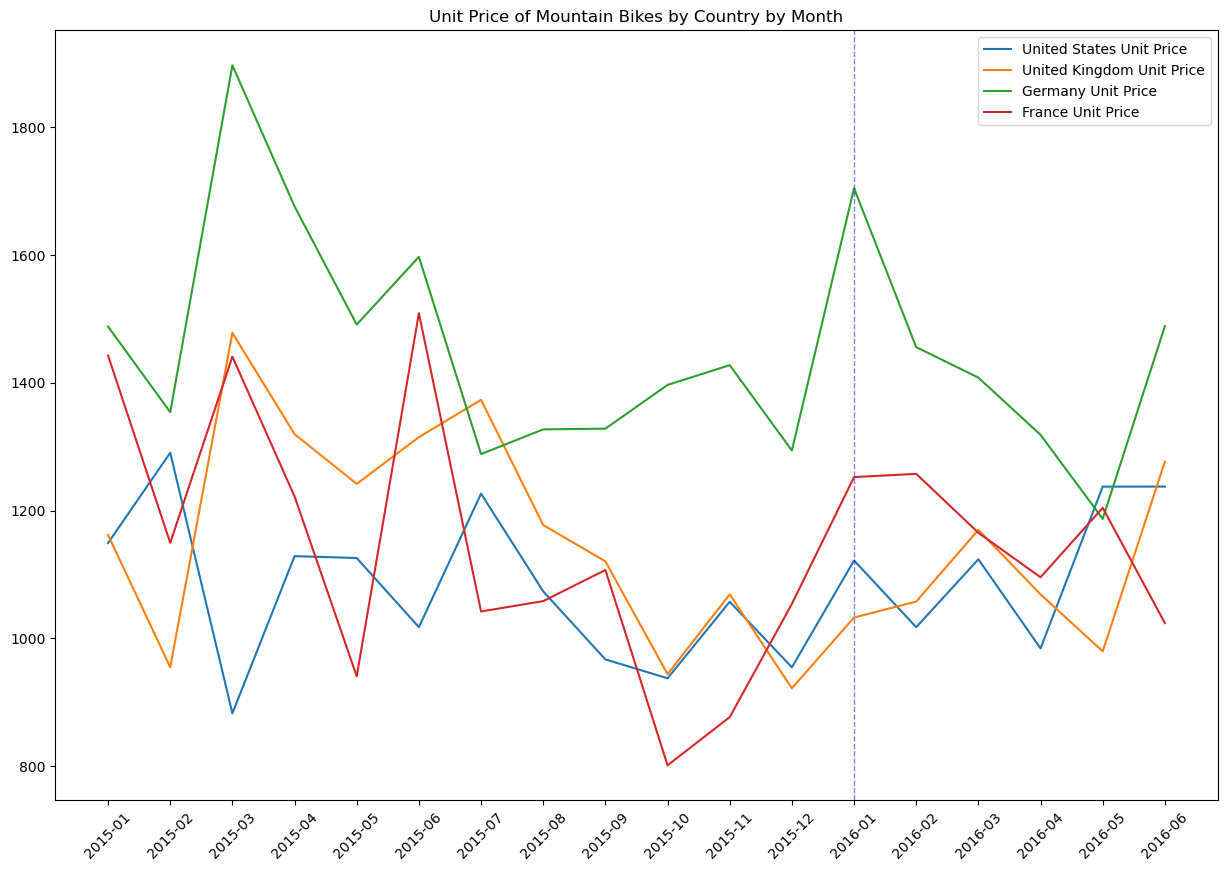

In [51]:
plt.figure(figsize=[15,10])
plt.plot(df_mt_us,label='United States Unit Price')
plt.plot(df_mt_uk,label='United Kingdom Unit Price')
plt.plot(df_mt_ge,label='Germany Unit Price')
plt.plot(df_mt_fr,label='France Unit Price')
plt.axvline(x=12,color='blue',lw=1,ls='--',alpha=0.5)
plt.legend(loc=1)
plt.title('Unit Price of Mountain Bikes by Country by Month')
plt.xticks(rotation=45)
plt.show();

In [52]:
df_mt_us_c=df_Mountain[df_Mountain['Country']=='United States'].groupby('Year_Month')['Unit Cost'].mean()
df_mt_uk_c=df_Mountain[df_Mountain['Country']=='United Kingdom'].groupby('Year_Month')['Unit Cost'].mean()
df_mt_ge_c=df_Mountain[df_Mountain['Country']=='Germany'].groupby('Year_Month')['Unit Cost'].mean()
df_mt_fr_c=df_Mountain[df_Mountain['Country']=='France'].groupby('Year_Month')['Unit Cost'].mean()

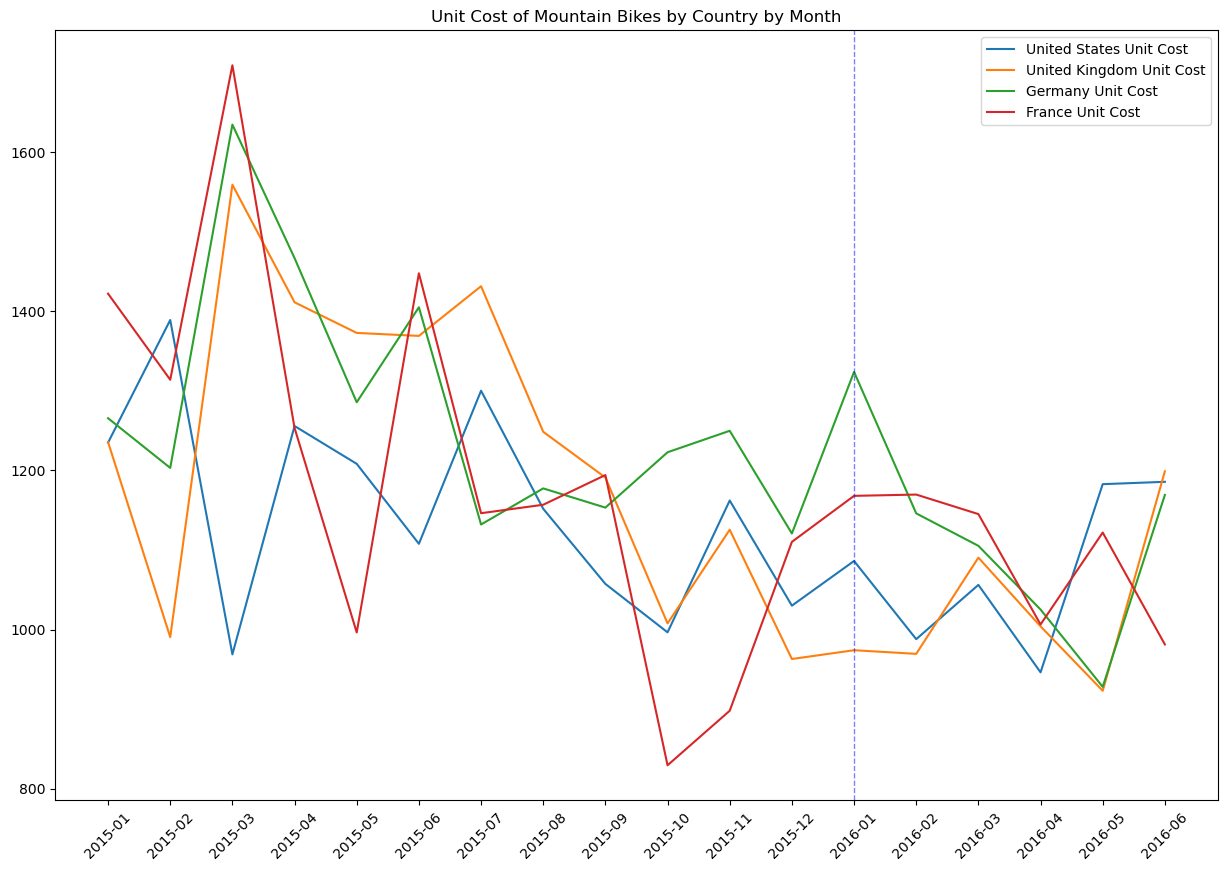

In [53]:
plt.figure(figsize=[15,10])
plt.plot(df_mt_us_c,label='United States Unit Cost')
plt.plot(df_mt_uk_c,label='United Kingdom Unit Cost')
plt.plot(df_mt_ge_c,label='Germany Unit Cost')
plt.plot(df_mt_fr_c,label='France Unit Cost')
plt.axvline(x=12,color='blue',lw=1,ls='--',alpha=0.5)
plt.legend(loc=1)
plt.title('Unit Cost of Mountain Bikes by Country by Month')
plt.xticks(rotation=45)
plt.show();

In [54]:
df_mt_us_m=df_Mountain[df_Mountain['Country']=='United States'].groupby('Year_Month')['Unit_Margin'].mean()
df_mt_uk_m=df_Mountain[df_Mountain['Country']=='United Kingdom'].groupby('Year_Month')['Unit_Margin'].mean()
df_mt_ge_m=df_Mountain[df_Mountain['Country']=='Germany'].groupby('Year_Month')['Unit_Margin'].mean()
df_mt_fr_m=df_Mountain[df_Mountain['Country']=='France'].groupby('Year_Month')['Unit_Margin'].mean()

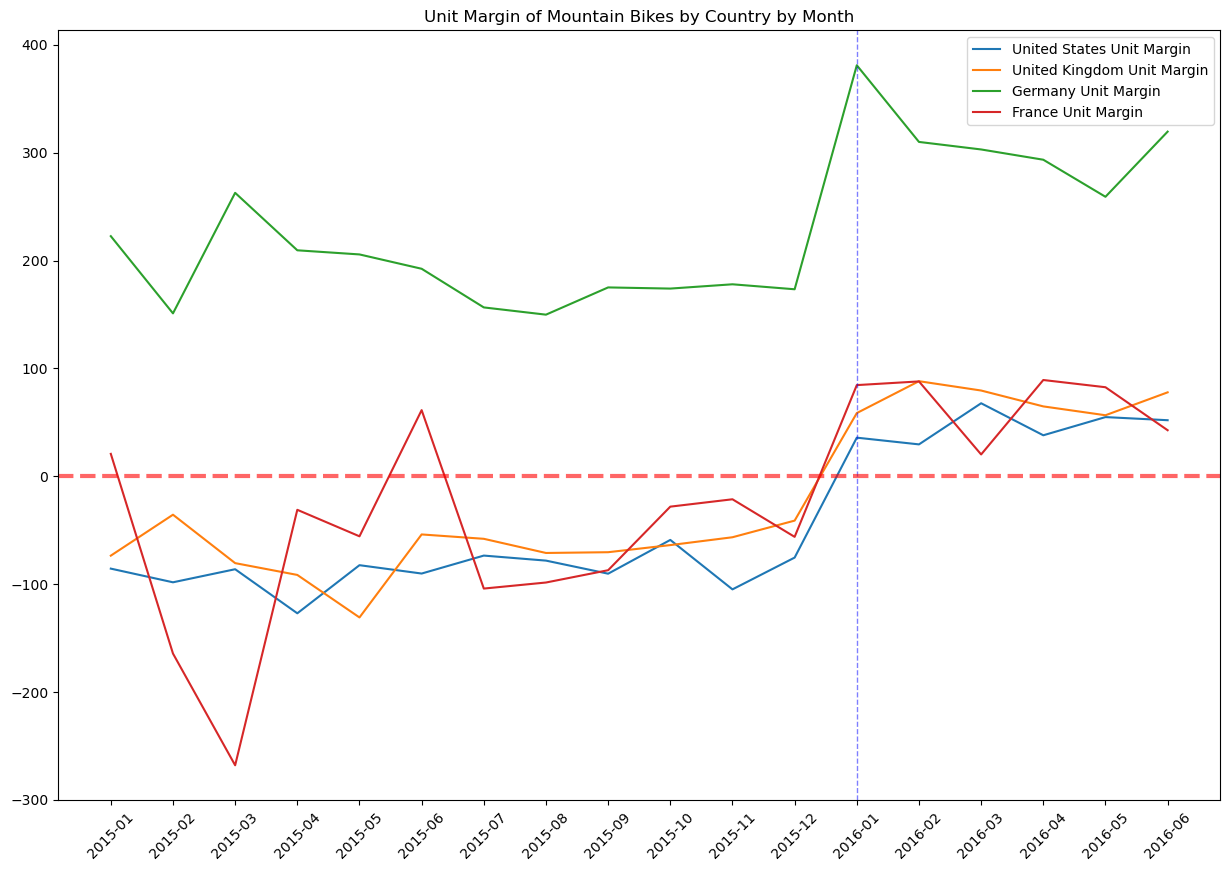

In [55]:
plt.figure(figsize=[15,10])
plt.plot(df_mt_us_m,label='United States Unit Margin')
plt.plot(df_mt_uk_m,label='United Kingdom Unit Margin')
plt.plot(df_mt_ge_m,label='Germany Unit Margin')
plt.plot(df_mt_fr_m,label='France Unit Margin')
plt.axvline(x=12,color='blue',lw=1,ls='--',alpha=0.5)
plt.axhline(y=0,color='red',lw=3,ls='--',alpha=0.6);
plt.legend(loc=1)
plt.title('Unit Margin of Mountain Bikes by Country by Month')
plt.xticks(rotation=45)
plt.show();

**2) Unit Cost ✖️ Unit Price of Mountain Bikes by Country**

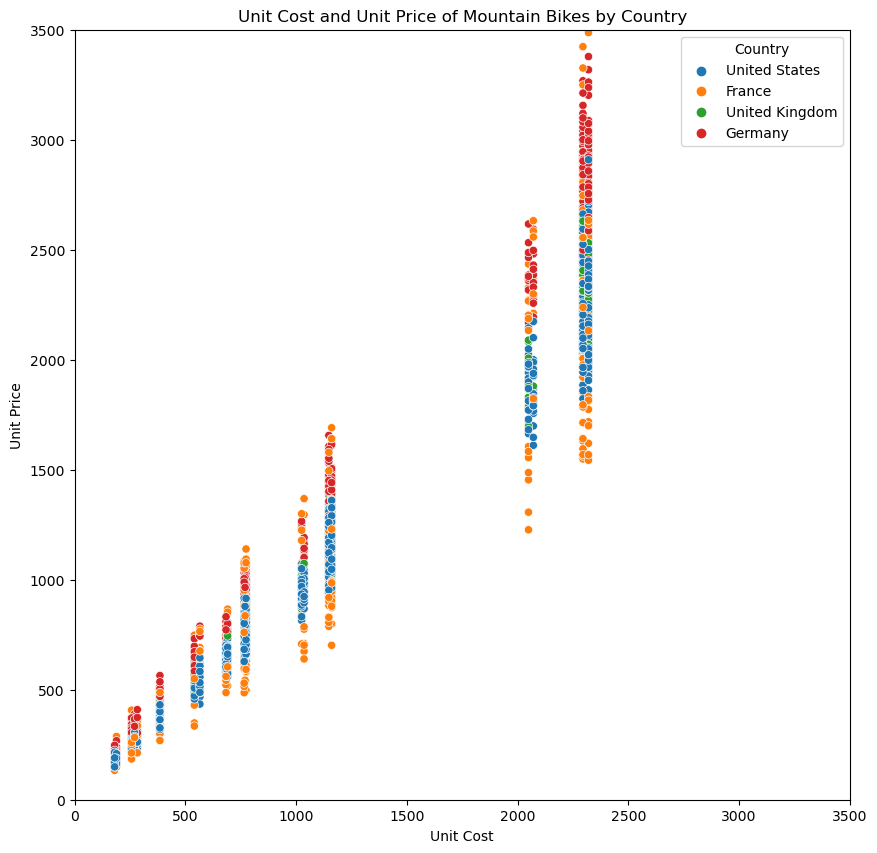

In [56]:
plt.figure(figsize=[10,10])
plt.xlim(0,3500)
plt.ylim(0,3500)
plt.title('Unit Cost and Unit Price of Mountain Bikes by Country')
sns.scatterplot(data=df_Mountain, x='Unit Cost',y='Unit Price',hue='Country');

# Insight

**In the case of Mountaion Bikes, Germany has kept the unit price appropriately, and as a result, they has been kept good profitability. It means that United States, United Kingdom and France should follow the pricing strategy of Germany as good benchmark. Or they already learned and improved in January 2016 because Average Unit Margin of Mountain Bikes of three countries  were improved in January 2016...**

**One of the measurement for good pricing is 'Branding'. So one of the reason why German has been kept good profitability may come from their good Branding. Anyway, this case, we should look into the detail of pricing strategy of Germany.**

**For example, shall we look into average age of Mountain Bikes Customer by Countries ?**

**1) Average age of Mountain Bikes Customer by Countries by Month**

In [57]:
df_mt_us_a=df_Mountain[df_Mountain['Country']=='United States'].groupby('Year_Month')['Customer Age'].mean()
df_mt_uk_a=df_Mountain[df_Mountain['Country']=='United Kingdom'].groupby('Year_Month')['Customer Age'].mean()
df_mt_ge_a=df_Mountain[df_Mountain['Country']=='Germany'].groupby('Year_Month')['Customer Age'].mean()
df_mt_fr_a=df_Mountain[df_Mountain['Country']=='France'].groupby('Year_Month')['Customer Age'].mean()

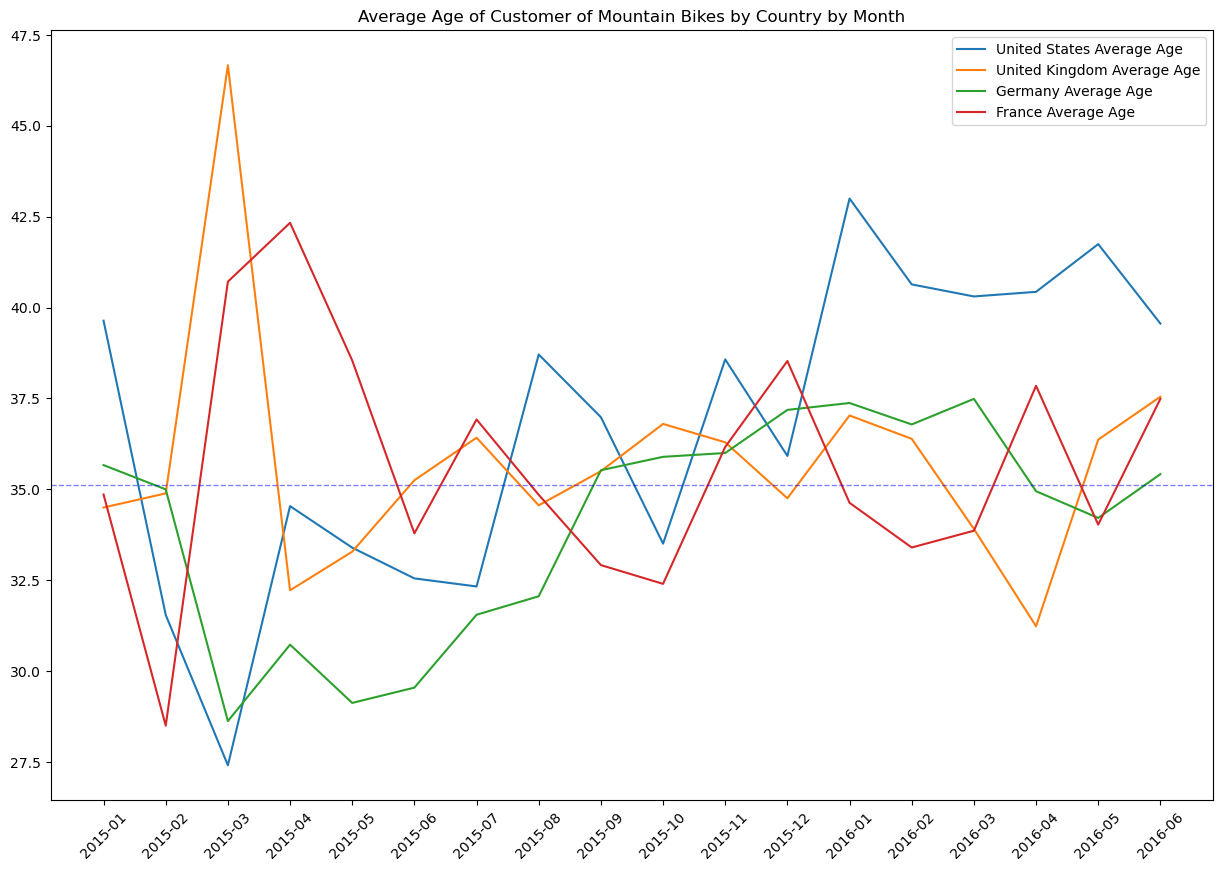

In [58]:
plt.figure(figsize=[15,10])
plt.plot(df_mt_us_a,label='United States Average Age')
plt.plot(df_mt_uk_a,label='United Kingdom Average Age')
plt.plot(df_mt_ge_a,label='Germany Average Age')
plt.plot(df_mt_fr_a,label='France Average Age')
plt.axhline(y=35.1225,color='blue',lw=1,ls='--',alpha=0.5)
plt.legend(loc=1)
plt.title('Average Age of Customer of Mountain Bikes by Country by Month')
plt.xticks(rotation=45)
plt.show();

**2) Average Age Comparison by Country - Mountain Bikes**

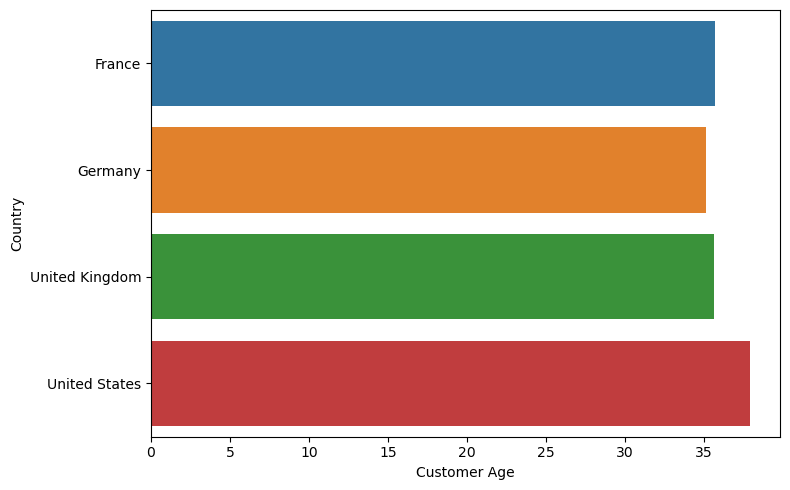

In [59]:
fig = plt.figure(figsize=(8,5))
sns.barplot(data=df_Mountain.groupby('Country').mean(),
            x=df_Mountain.groupby('Country').mean()['Customer Age'],
            y=df_Mountain.groupby('Country').mean().index)

plt.tight_layout()
plt.show()

**3) Average Age Comparison by Country - Total**

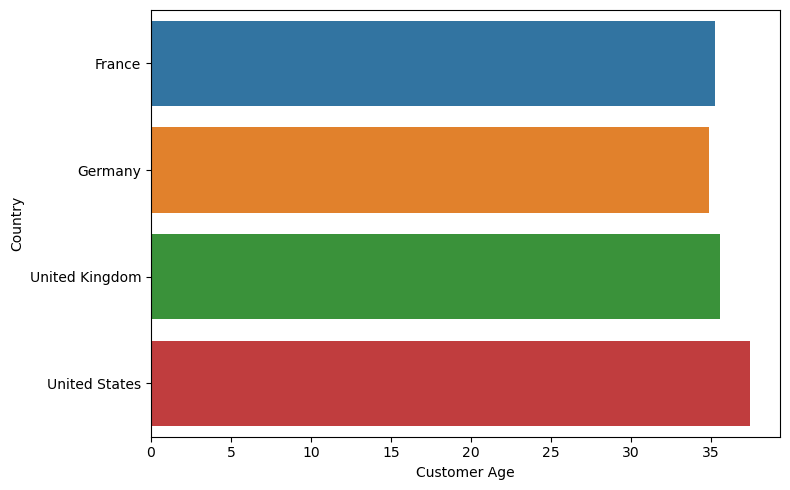

In [60]:
fig = plt.figure(figsize=(8,5))
sns.barplot(data=df_Mountain.groupby('Country').mean(),
            x=df.groupby('Country').mean()['Customer Age'],
            y=df.groupby('Country').mean().index)

plt.tight_layout()
plt.show()

**Customer Average Age is lowest in Germany not only in Mountain Bike but also in total. One of the bench mark may be target age of Germany...**

**And for example, as we can see in below picture, there are some difference in Brand preference among countries. So we also have to consider the difference of preference.**